# Visualising Job Outcomes of Different College Majors

Each year millions of students are faced with the anxiety inducing process of choosing a major field of study. With a plethora of opportunites out there, identifying the best path can be challenging. This is why it is important for students to research and carefully analyse their options. Apart from choosing a major that matches their natural talents and interests, students should consider the following:
- Salary expectations; 
- Under-employment rates in the field;
- Unemployment rates in the field; and
- Whether or not going to college is really necessary for their chosen career.

In this project I'll explore majors of US students who graduated from college between 2010 and 2012 using data from surveys conducted by American Community Survey. FiveThirtyEight cleaned the data from these surveys and made it available on their Github [repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). Using visualisations, I'll explore questions from the dataset including:

- Which majors and major categories have the highest and lowest median salaries? 
- Which majors and major categories have the lowest and highest unemployement rates?
- Which majors and major categories have the lowest and highest under-employement rates?
- Which majors and major categories have the lowest and highest rates of graduates in jobs that don't require a degree?
- How do majors that are predominantly male compare to majors that are predominantly female?
- Do students in more popular majors make more money?

# Explore the Data

In [19]:
#Import pandas, matplotlib and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Read dataset into pandas 
recent_grads = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')
# Create new columns
recent_grads["share_pt"] = recent_grads["Part_time"]/recent_grads["Total"]
recent_grads["share_ncj"] = recent_grads["Non_college_jobs"]/recent_grads["Total"]
recent_grads["share_lwj"] = recent_grads["Low_wage_jobs"]/recent_grads["Total"]
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,share_pt,share_ncj,share_lwj
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,0.018381,110000,95000,125000,1534,364,193,0.115434,0.155622,0.082514
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,0.117241,75000,55000,90000,350,257,50,0.224868,0.339947,0.066138
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,0.024096,73000,50000,105000,456,176,0,0.155374,0.205607,0.000000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,0.050125,70000,43000,80000,529,102,0,0.119237,0.081081,0.000000
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,0.061098,65000,50000,75000,18314,4440,972,0.160570,0.137632,0.030130


In [20]:
#remove missing values
raw_data_count = recent_grads.shape
print(raw_data_count)
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape
print(cleaned_data_count)

(173, 24)
(172, 24)


Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank: Rank by median earnings (the dataset is ordered by this column).
- Major_code: Major code.
- Major: Major description.
- Major_category: Category of major.
- Total: Total number of people with major.
- Sample_size: Sample size (unweighted) of full-time.
- Men: Male graduates.
- Women: Female graduates.
- ShareWomen: Women as share of total.
- Employed: Number employed.
- Median: Median salary of full-time, year-round workers.
- Low_wage_jobs: Number in low-wage service jobs.
- Full_time: Number employed 35 hours or more.
- Part_time: Number employed less than 35 hours.

# Median Salary

While earning a premium salary isn't necessarily an ingredient for happiness, it definitely is nice to see a return on investment after four long years of study. Lets take a look at which students are reporting the highest and lowest median salaries.

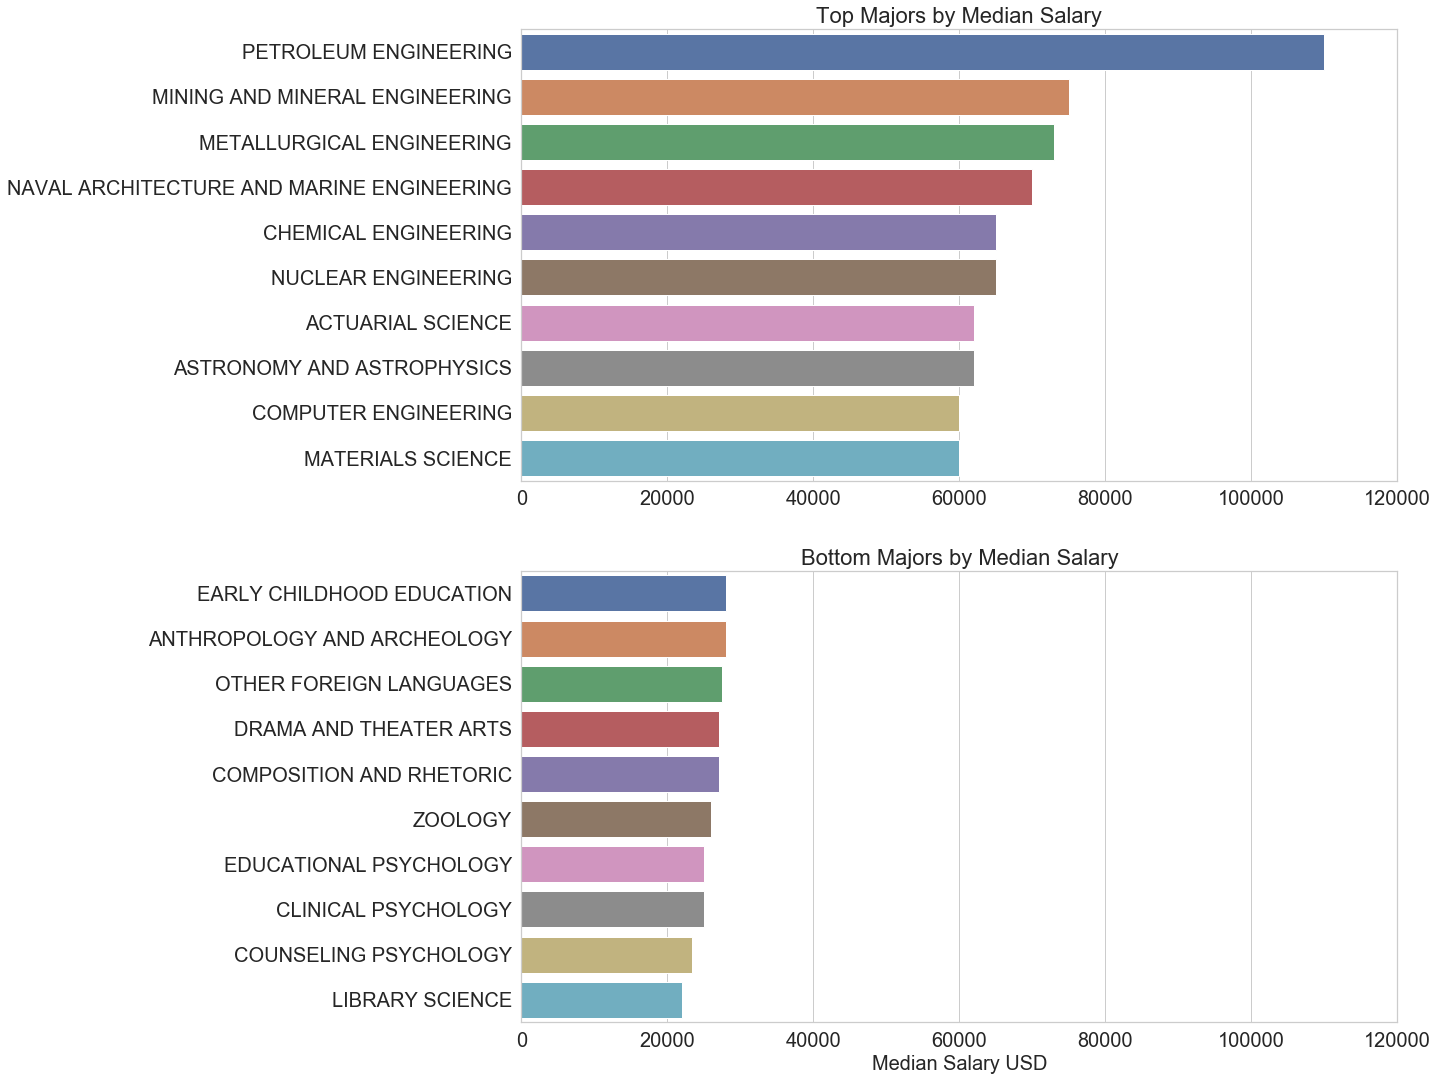

In [21]:
# Sort values
recent_grads = recent_grads.sort_values("Median", ascending = False)

# Split into heads and tails
head = recent_grads[["Major", "Median"]].head(10)
tail = recent_grads[["Major", "Median"]].tail(10)

# Plot
fig, (ax1, ax2) = plt.subplots(nrows=2)
sns.set(style="whitegrid")
fig.set_size_inches(15.7, 18.27)
sns.barplot(x="Median", y="Major", data=head, ax=ax1)
sns.barplot(x="Median", y="Major", data=tail, ax=ax2)
ax1.set_title("Top Majors by Median Salary", size=22)
ax2.set_title("Bottom Majors by Median Salary", size=22)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Median Salary USD", size=20)
plt.rc('xtick', labelsize=20)   
plt.rc('ytick', labelsize=20)
ax1.set_xlim(0,120000)
ax2.set_xlim(0,120000)

plt.show()

Unsurprisingly, engineering and science based majors dominate the top end of the salary rankings, while the bottom primarily contains majors relating to arts and social sciences. Lets now take a look at the bigger picture by ranking major categories by mean median salary. 

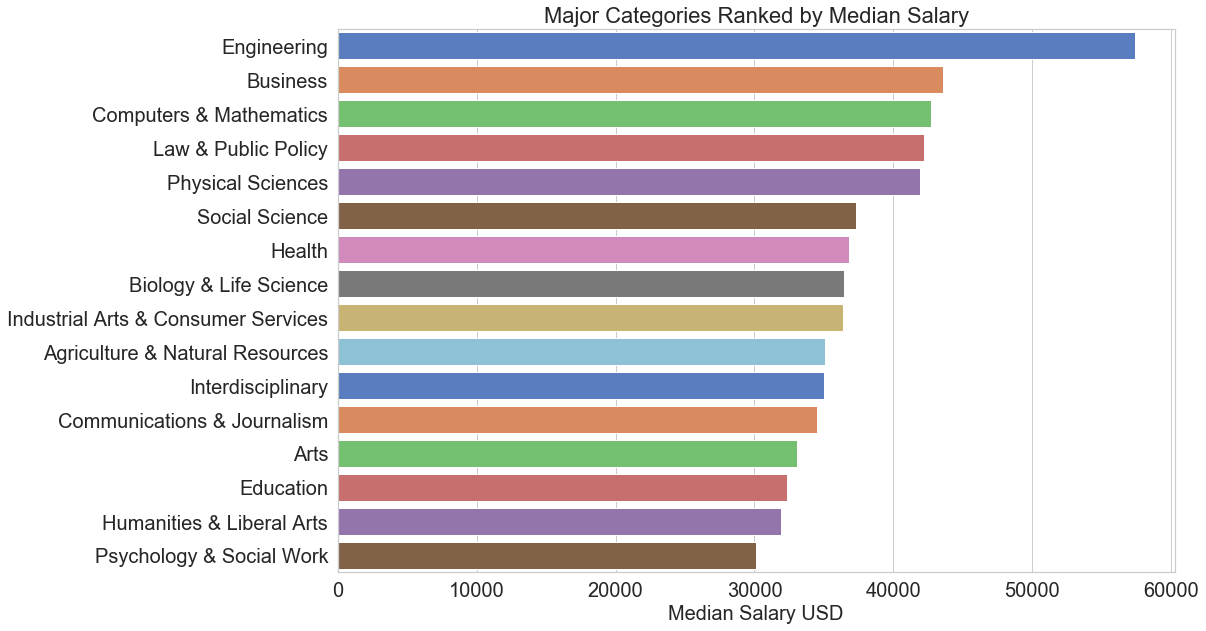

In [22]:
# group by major category column, calc mean median salary and sort values
major_category = recent_grads.groupby("Major_category")
mc_median = major_category["Median"].mean().sort_values(ascending=False)
mc_median = pd.DataFrame(mc_median)
mc_median["Major Category"] = mc_median.index.values

# plot 
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x="Median", y="Major Category", data=mc_median, palette="muted")
plt.title("Major Categories Ranked by Median Salary", size=22)
plt.xlabel("Median Salary USD", size=20)
plt.ylabel("")
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Looking at the median salaries across all major categories reveals a similar trend: science and technology major categories feature heavily in the top end, while arts major categories dominate the bottom end. However, there are some non-science based subjects, such as business and law, that pay reasonably high salaries. It's also interesting to note that not all STEM degrees are equal. Engineering and computer science majors pay a more handsome salary on average compared to biology and life science majors.

# Unemployment Rate
Another important consideration in choosing a major area of study is the employment rates in the field. Afterall, there isn't really much point in spending a great deal time, money and effort studying a major that isn't going to lead to a job. Now we have an idea about which majors and major categories yield the most income, lets take a look at which ones have the highest and lowest unemployment rates. 

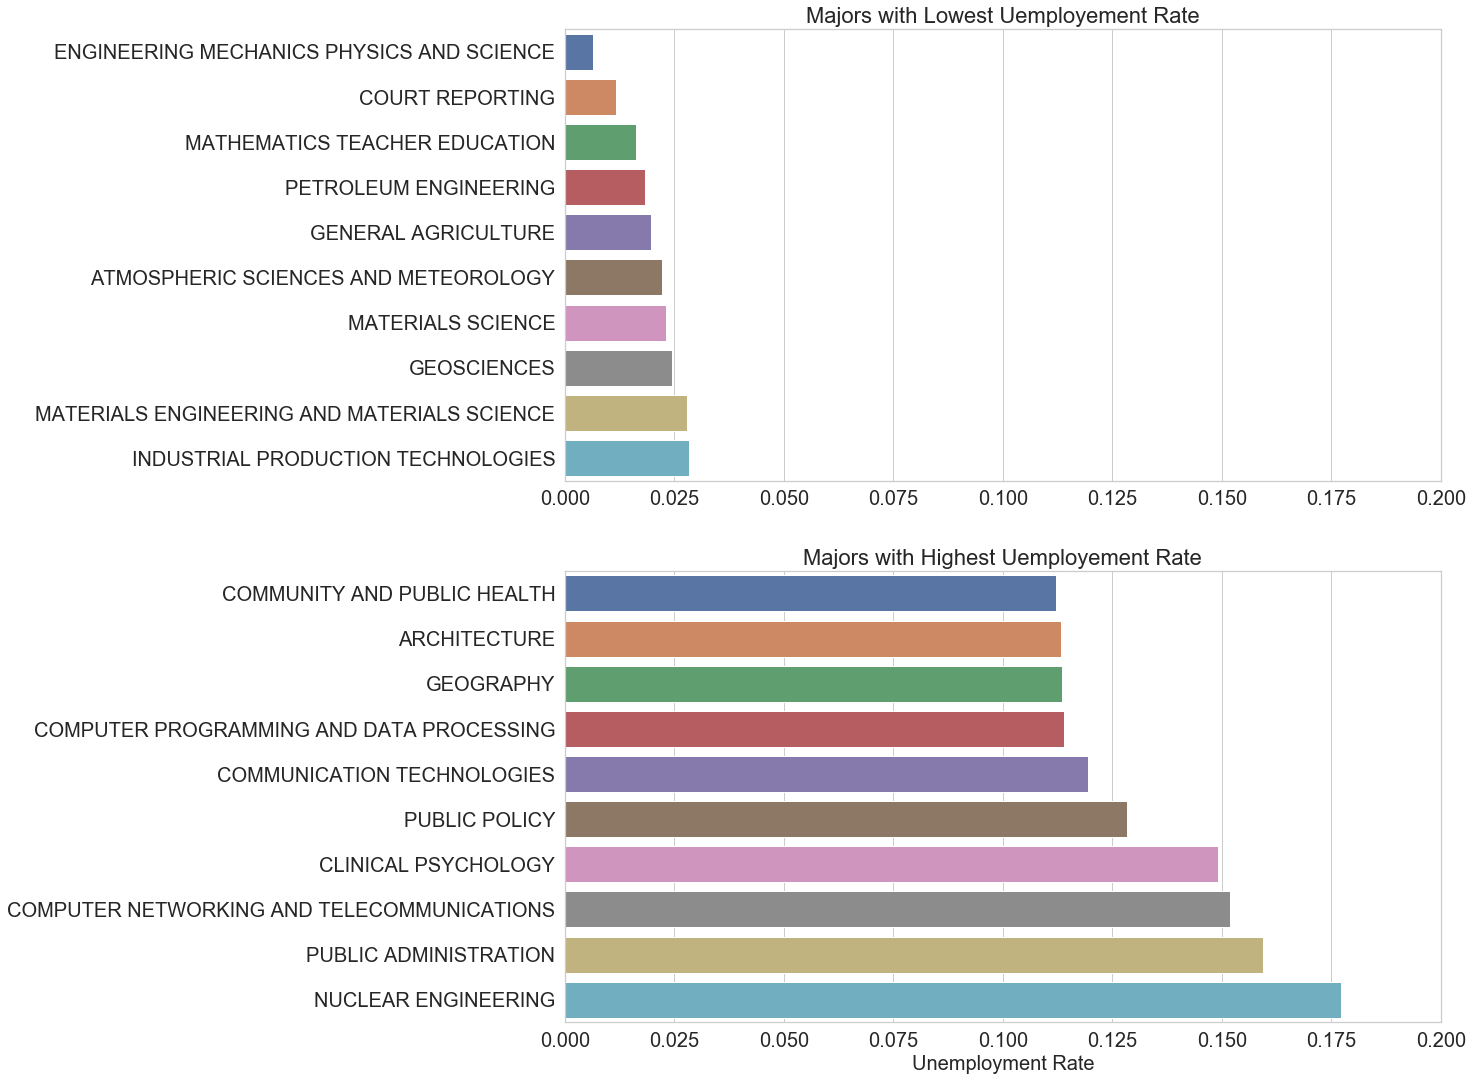

In [24]:
# Sort values
recent_grads = recent_grads.sort_values("Unemployment_rate", ascending = True)
recent_grads_2 = recent_grads[recent_grads["Sample_size"] > 10].copy()

# Split into heads and tails
head = recent_grads_2[["Major", "Median", "Unemployment_rate"]].head(10)
tail = recent_grads_2[["Major", "Median", "Unemployment_rate"]].tail(10)

#Plot
fig, (ax1, ax2) = plt.subplots(nrows=2)
sns.set(style="whitegrid")
fig.set_size_inches(15.7, 18.27)
sns.barplot(x="Unemployment_rate", y="Major", data=head, ax=ax1)
sns.barplot(x="Unemployment_rate", y="Major", data=tail, ax=ax2)
ax1.set_title("Majors with Lowest Uemployement Rate", size=22)
ax2.set_title("Majors with Highest Uemployement Rate", size=22)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Unemployment Rate", size=20)
ax1.set_xlim(0,0.20)
ax2.set_xlim(0,0.20)
plt.rc('xtick', labelsize=20)   
plt.rc('ytick', labelsize=20)

plt.show()

At first glance it would seem that the more lucrative STEM majors we saw at the top end of the median salary rankings are the safest when it comes to the risk of unemployment. Lets plot median salary against unemployment rate and check for correlation. 

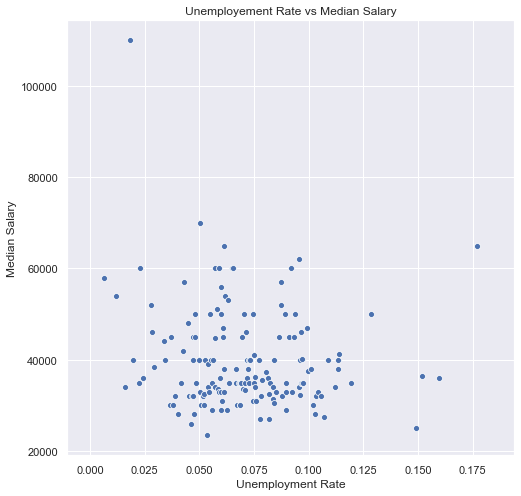

Correlation = -0.13744459883889862


In [25]:
# Plot scatter plot
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x="Unemployment_rate", y="Median", data=recent_grads_2)
plt.title("Unemployement Rate vs Median Salary")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Salary")
plt.show()
print("Correlation = {}".format(recent_grads_2["Unemployment_rate"].corr(recent_grads_2["Median"])))

So there is a weak negative correlation between unemployment rate and median salary. For quite a few of the well paying majors unemployment rate is low, however this is not the case for all of them. There are also quite a few low paying majors with low unemployment rates. 

Next, lets take a look at the average unemployment rate for each major category.

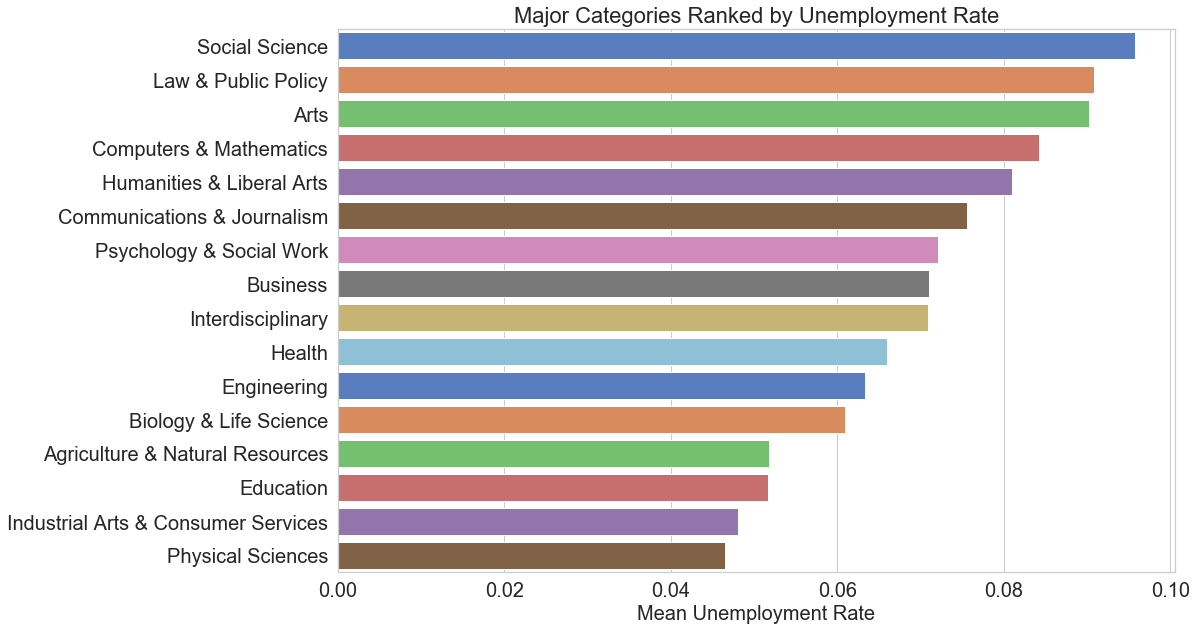

In [26]:
# group by major category column, calc mean unemployment rate and sort values
mc_unemployment = major_category["Unemployment_rate"].mean().sort_values(ascending=False)
mc_unemployment = pd.DataFrame(mc_unemployment)
mc_unemployment["Major Category"] = mc_unemployment.index.values

# plot 
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x="Unemployment_rate", y="Major Category", data=mc_unemployment, palette="muted")
plt.title("Major Categories Ranked by Unemployment Rate", size=22)
plt.xlabel("Mean Unemployment Rate", size=20)
plt.ylabel("")
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Out of all the major categories, Social Science has the highest unemployment rate, followed by Law and Public Policy and Arts. Major categories with the lowest risk of unemployment are Physical Sciences, Industrial Art and Consumer Services and Education. This plot confirms the observations made before that choosing a lucrative major doesn't necessarily result in a low risk of unemployment. Law or Mathematics majors might have a high median salary but they also have a high unemployement rate. Conversely, Education majors may not make much money but atleast they have a fairly low risk of unemployment. 

# Part Time Employment Rate

While unemployment rate can give us a good idea of which majors are most likely to lead to a job, it doesn't tell us much about the number of underemployed people. A major could have a high employment rate but that doesn't mean very much if the share of people employed on a full time basis is very low. Being underemployed is still not a very ideal situation and students picking their major should take this into consideration. 

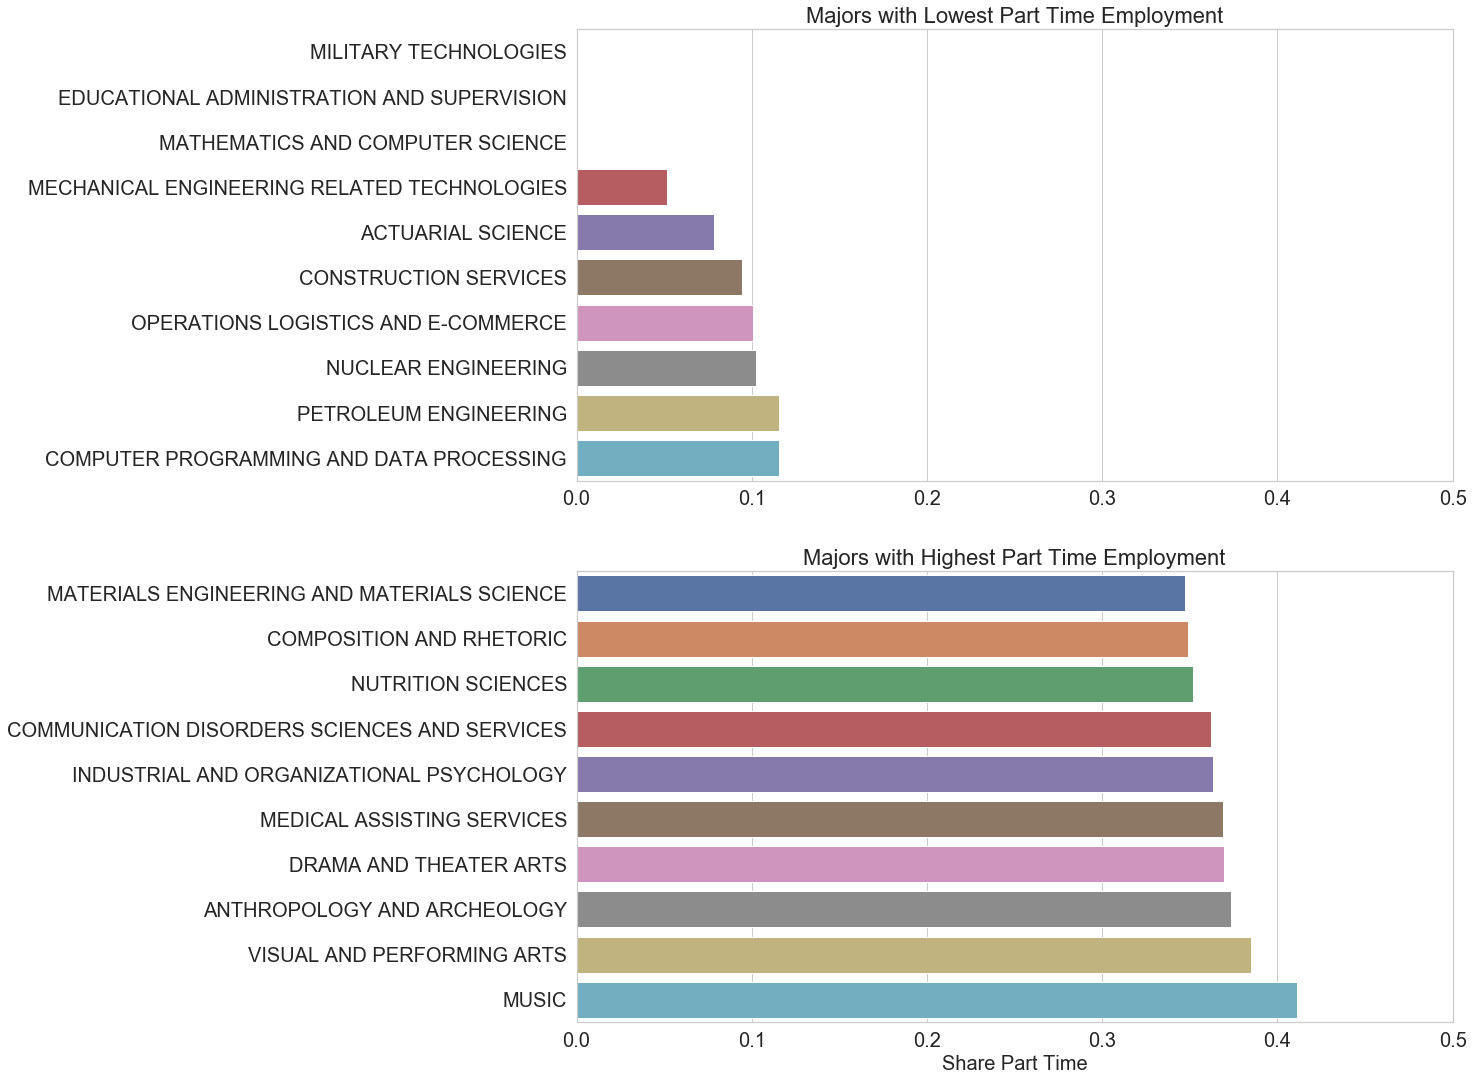

In [40]:
# Sort values
recent_grads = recent_grads.sort_values("share_pt", ascending = True)

# Split into heads and tails
head = recent_grads[["Major", "share_pt"]].head(10)
tail = recent_grads[["Major", "share_pt"]].tail(10)

#Plot
fig, (ax1, ax2) = plt.subplots(nrows=2)
sns.set(style="whitegrid")
fig.set_size_inches(15.7, 18.27)
sns.barplot(x="share_pt", y="Major", data=head, ax=ax1)
sns.barplot(x="share_pt", y="Major", data=tail, ax=ax2)
ax1.set_title("Majors with Lowest Part Time Employment", size=22)
ax2.set_title("Majors with Highest Part Time Employment", size=22)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Share Part Time", size=20)
ax1.set_xlim(0,0.50)
ax2.set_xlim(0,0.50)
plt.rc('xtick', labelsize=20)   
plt.rc('ytick', labelsize=20)

plt.show()

Performance art majors have the highest share of students in part time employment which is not really surprising. There is one engineering major in the top 10 for highest part time employment which is interesting to note. It would seem that not all STEM majors are protected from under-employment. 

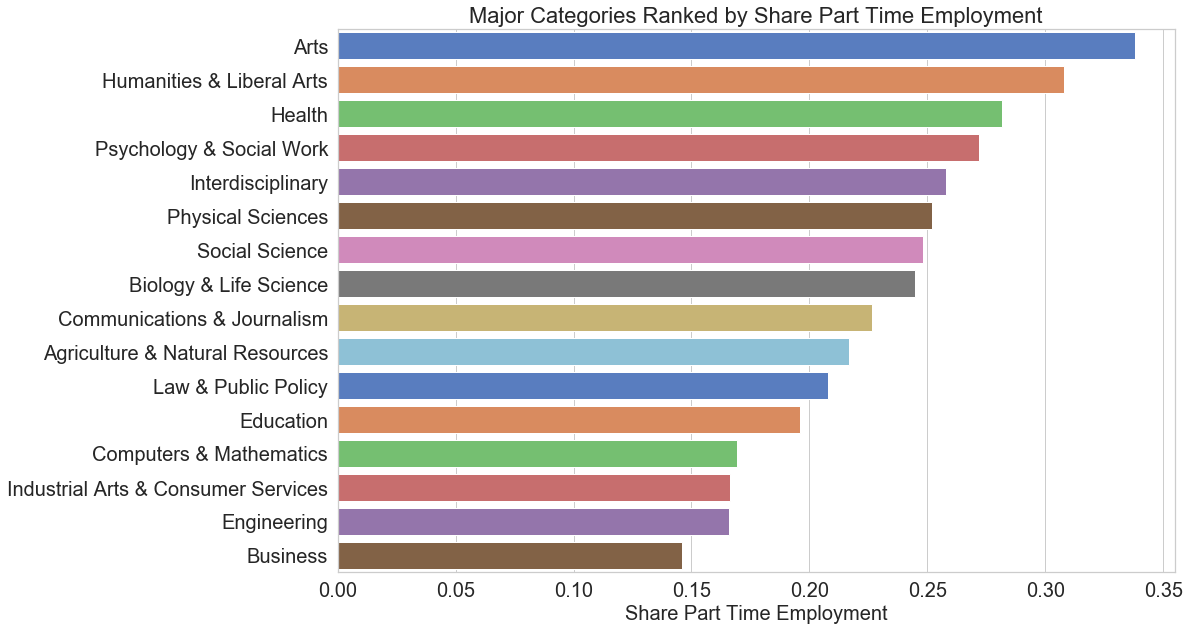

In [27]:
# group by major category column, calc mean share of part time employment and sort values
mc_pt = major_category["share_pt"].mean().sort_values(ascending=False)
mc_pt = pd.DataFrame(mc_pt)
mc_pt["Major Category"] = mc_pt.index.values

# plot 
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x="share_pt", y="Major Category", data=mc_pt, palette="muted")
plt.title("Major Categories Ranked by Share Part Time Employment", size=22)
plt.xlabel("Share Part Time Employment", size=20)
plt.ylabel("")
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Arts majors lead the major categories on part time employment rates, while Business and Engineering majors have the lowest rates. Its interesting to note that Health majors have a fairly high part time employment rate as well as some Science majors. 

# Jobs that don't Require a College Degree
Another thing to consider when choosing a major is the risk of ending up in a job that doesn't even require a college degree. Obviously this isn't an ideal scenario given the amount of time and money that is invested in a college degree. 

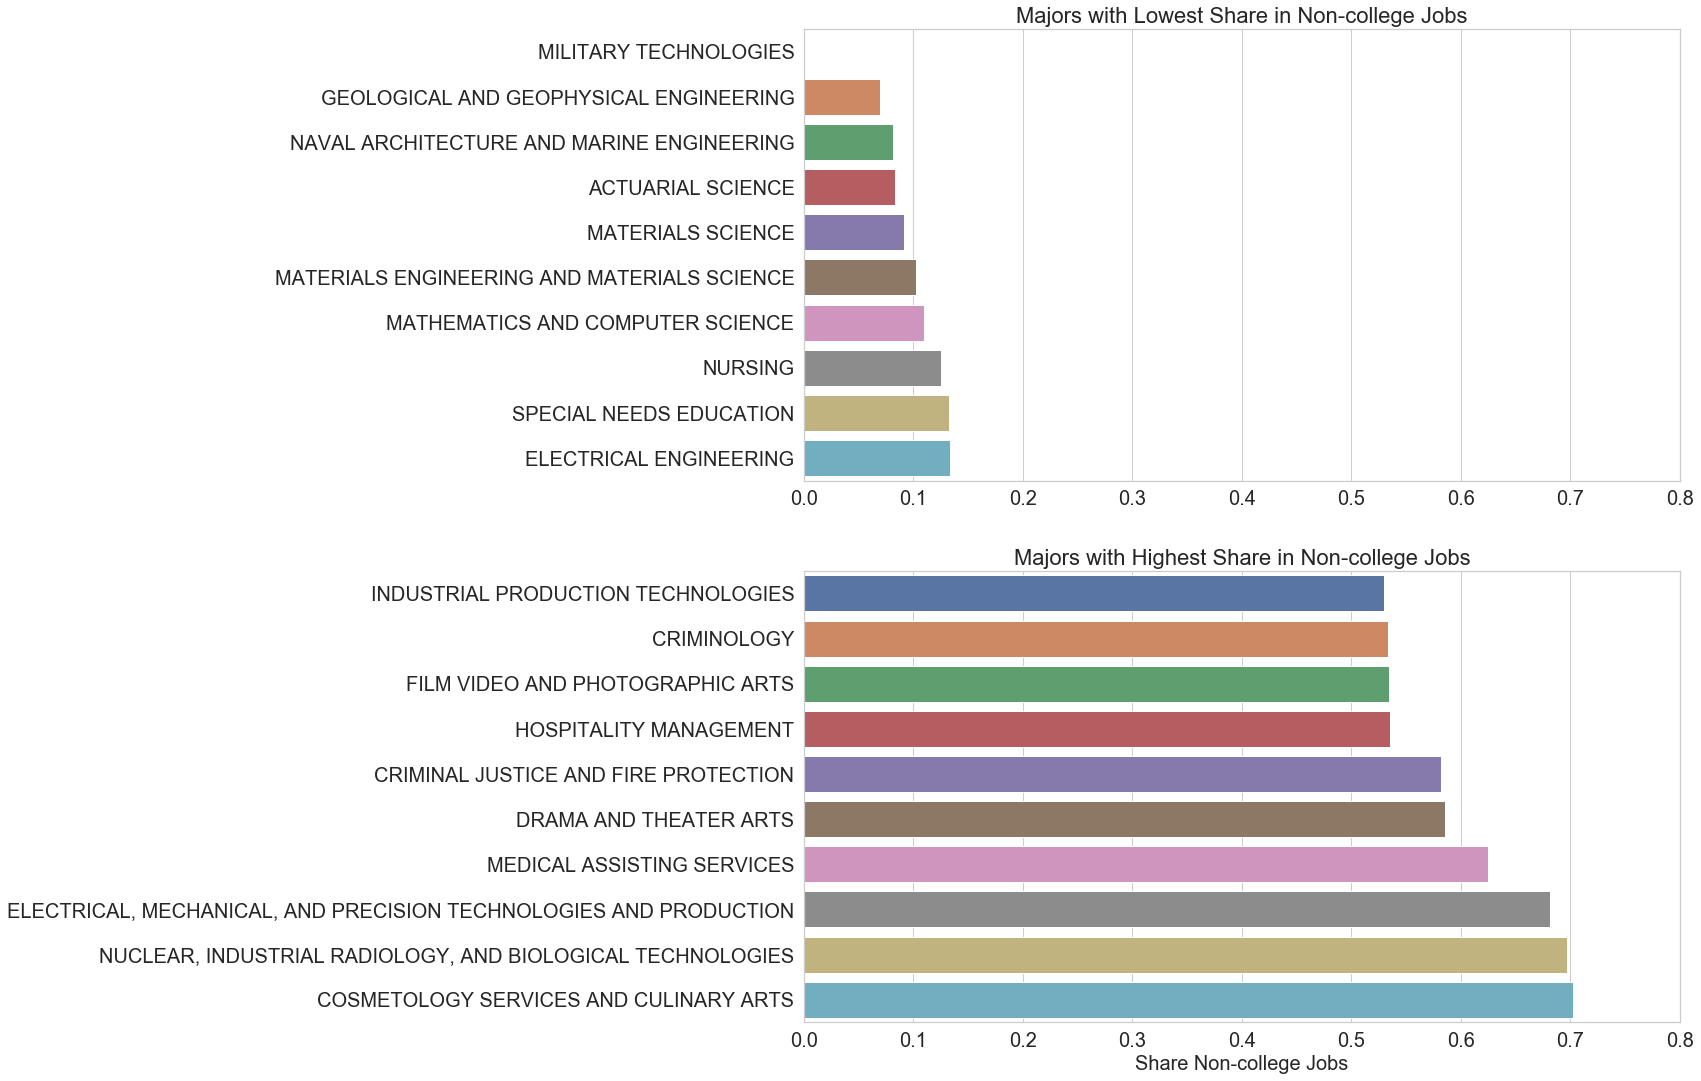

In [41]:
# Sort values
recent_grads = recent_grads.sort_values("share_ncj", ascending = True)

# Split into heads and tails
head = recent_grads[["Major", "share_ncj"]].head(10)
tail = recent_grads[["Major", "share_ncj"]].tail(10)

#Plot
fig, (ax1, ax2) = plt.subplots(nrows=2)
sns.set(style="whitegrid")
fig.set_size_inches(15.7, 18.27)
sns.barplot(x="share_ncj", y="Major", data=head, ax=ax1)
sns.barplot(x="share_ncj", y="Major", data=tail, ax=ax2)
ax1.set_title("Majors with Lowest Share in Non-college Jobs", size=22)
ax2.set_title("Majors with Highest Share in Non-college Jobs", size=22)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Share Non-college Jobs", size=20)
ax1.set_xlim(0,0.80)
ax2.set_xlim(0,0.80)
plt.rc('xtick', labelsize=20)   
plt.rc('ytick', labelsize=20)

plt.show()

We can see that majors with the lowest share of graduates in non-college jobs are primarily STEM majors, with the exception of Nursing and Special Needs Education. 

Looking at the majors with the highest number of graduates in non-college jobs we can see that a lot of them are for the type of professions where the standard pathway to a career is through an apprenticeship or on the job training. Students should consider whether there are other pathways into the field they want to enter as it seems going to college isn't always necessary.

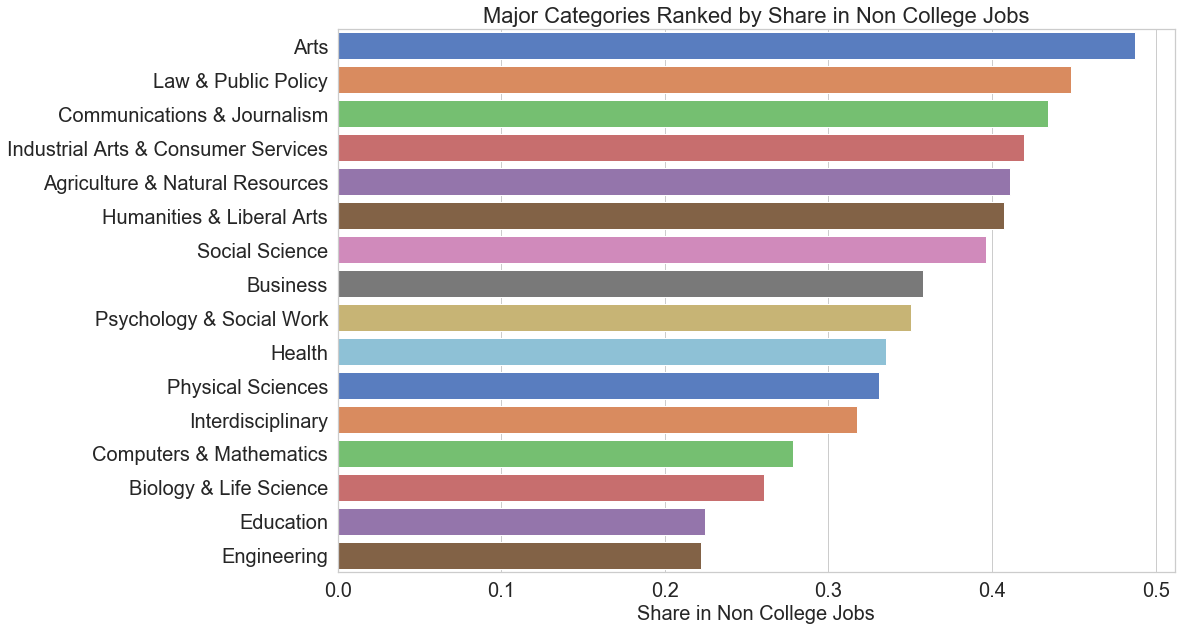

In [34]:
# group by major category column, calc mean share of part time employment and sort values
mc_ncj = major_category["share_ncj"].mean().sort_values(ascending=False)
mc_ncj = pd.DataFrame(mc_ncj)
mc_ncj["Major Category"] = mc_ncj.index.values

# plot 
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x="share_ncj", y="Major Category", data=mc_ncj, palette="muted")
plt.title("Major Categories Ranked by Share in Non College Jobs", size=22)
plt.xlabel("Share in Non College Jobs", size=20)
plt.ylabel("")
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Arts, Law & Public Policy and Communications & Journalism majors have the highest number of graduates employed in jobs that don't require a college degree, while Biology & Life Science, Education and Engineering majors have the lowest. 

With fairly high proportions of graduates ending up in non-college jobs for all major categories, it seems that going to college wasn't the right decision for a lot of graduates. Students should really consider whether pursuing a college education is the best course of action for themselves. 
# Female vs Male Majority Degrees

Some areas of study are notorious for being dominated by a single gender. Lets identify them by calculating the mean proportion of women for each major category. 

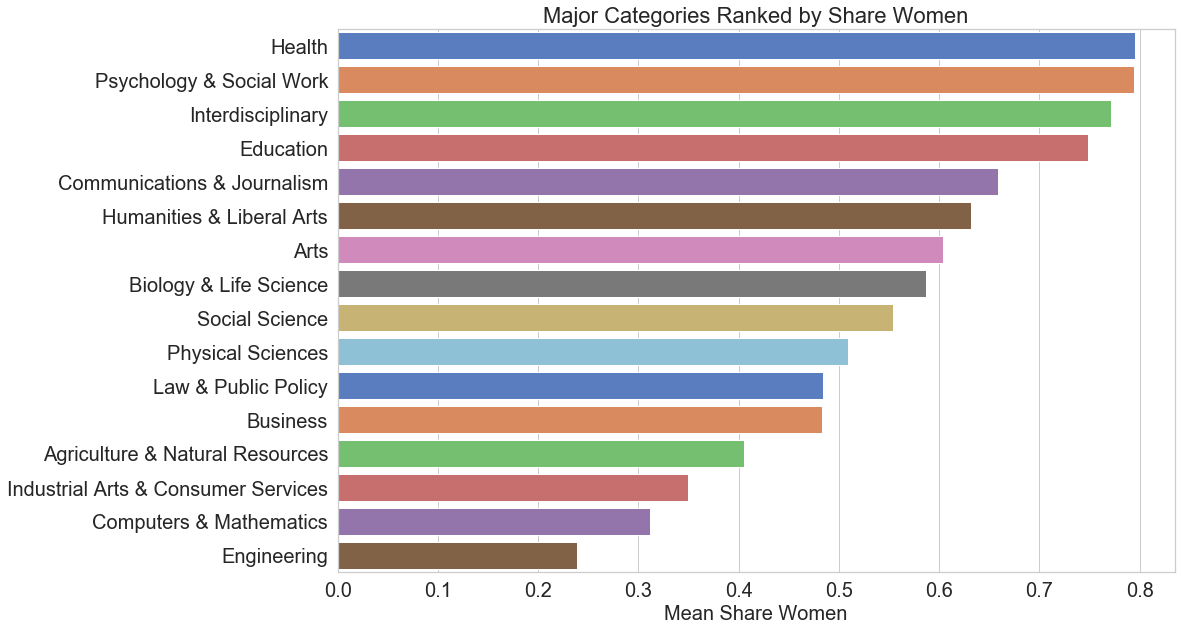

In [8]:
# Calc mean share women for each major category
mc_sharewomen = major_category["ShareWomen"].mean().sort_values(ascending=False)
mc_sharewomen = pd.DataFrame(mc_sharewomen)
mc_sharewomen["Major Category"] = mc_sharewomen.index.values
mc_sharewomen["ShareMen"] = 1 - mc_sharewomen["ShareWomen"]


# plot 
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x="ShareWomen", y="Major Category", data=mc_sharewomen, palette="muted")
plt.title("Major Categories Ranked by Share Women", size=22)
plt.xlabel("Mean Share Women", size=20)
plt.ylabel("")
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Health and Psychology & Social Work are both predomniately female, while Computers & Mathematics and Engineering are predominately male. Of all the STEM major categories (not including Health), Biology and Life Science has the highest share of women at close to 60%. Major Categories with the smallest gender gap are Physical Sciences, Law and Public Policy and Business. 

It's interesting to note that many of the major categories with a high proportion of female graduates also report lower median salaries, such as Education and Psychology and Social Work. Lets plot ShareWomen against Median Salary and check the correlation coefficient. 

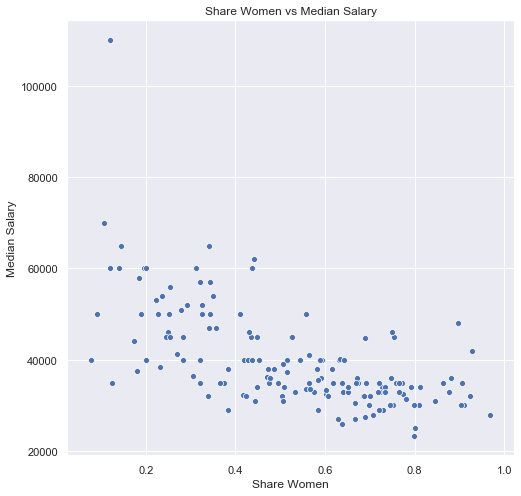

Correlation = -0.6228137308216051


In [11]:
# Scatter plot
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x="ShareWomen", y="Median", data=recent_grads_2)
plt.title("Share Women vs Median Salary")
plt.xlabel("Share Women")
plt.ylabel("Median Salary")
plt.show()
print("Correlation = {}".format(recent_grads_2["ShareWomen"].corr(recent_grads_2["Median"])))

As suspected, there is a moderate negative correlation between Share Women and Median Salary. Female college students might be wise to choose a college major with a high proportion of males to maximise there chances of earning a high income. 

# Popularity vs Median Salary
More generalised majors such Business and Psychology attract many more students each year than obscure, specialised majors like Soil Science. The questions is, is following the crowd the best course of action or would students be better off selecting a more niche area of study? Lets compare major popularity to median salary to find out. 

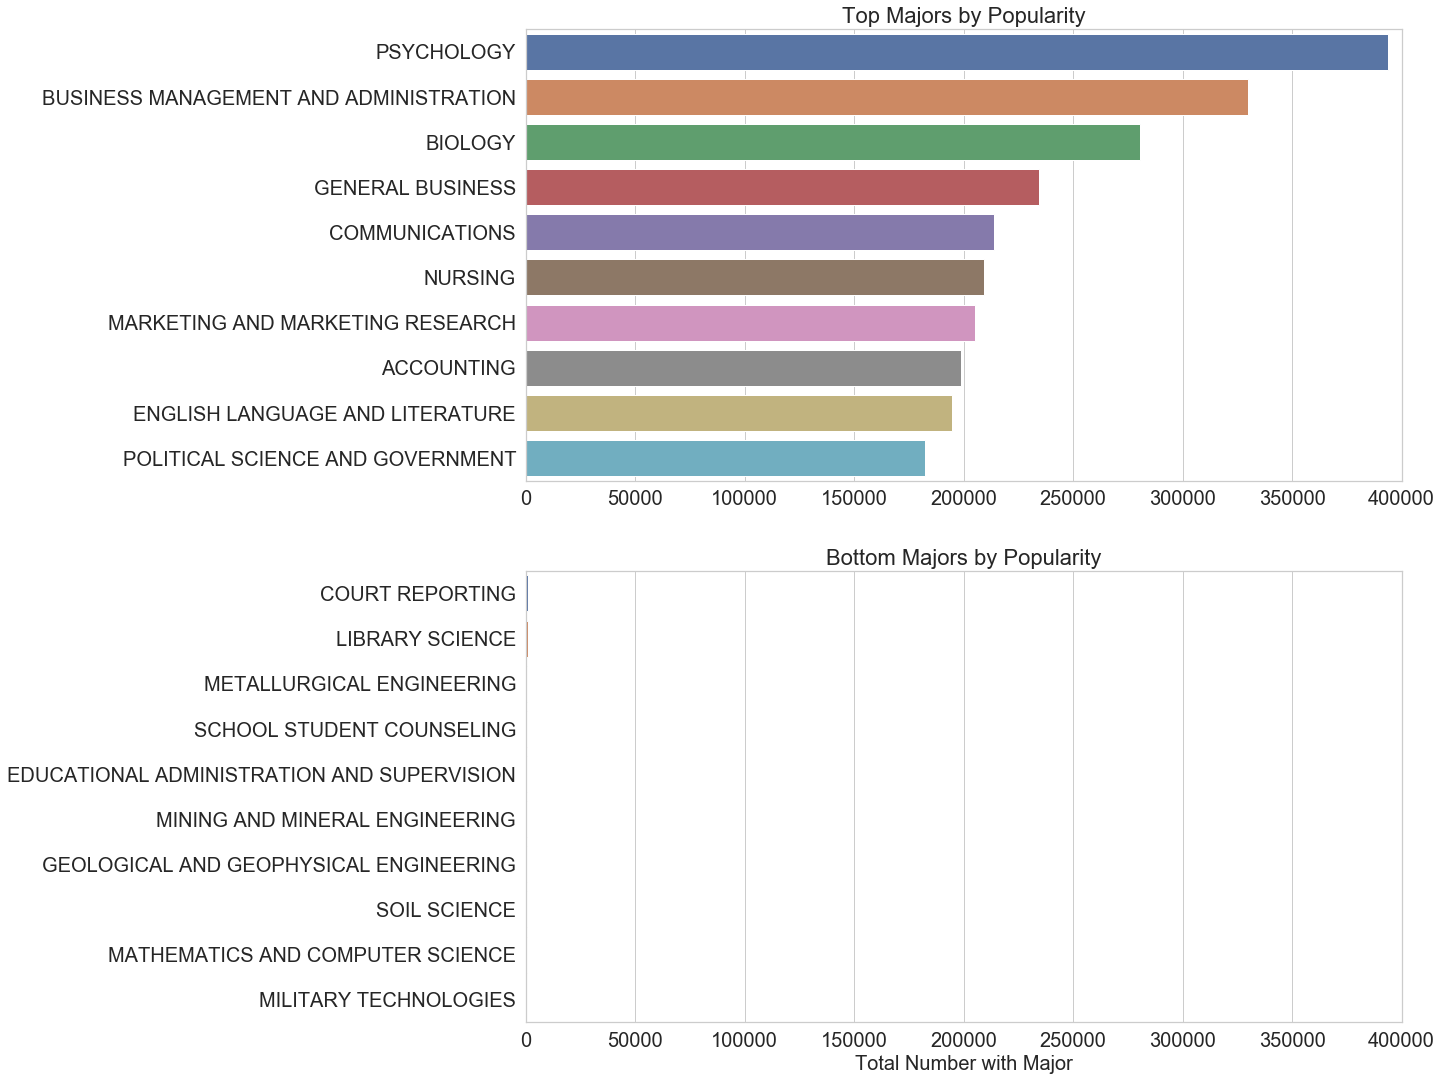

In [42]:
# Sort values
recent_grads_3 = recent_grads.sort_values("Total", ascending = False)

# Split into heads and tails
head = recent_grads_3[["Major", "Total", "Median"]].head(10)
tail = recent_grads_3[["Major", "Total", "Median"]].tail(10)

#Plot
fig, (ax1, ax2) = plt.subplots(nrows=2)
sns.set(style="whitegrid")
fig.set_size_inches(15.7, 18.27)
sns.barplot(x="Total", y="Major", data=head, ax=ax1)
sns.barplot(x="Total", y="Major", data=tail, ax=ax2)
ax1.set_title("Top Majors by Popularity", size=22)
ax2.set_title("Bottom Majors by Popularity", size=22)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Total Number with Major", size=20)
plt.rc('xtick', labelsize=20)   
plt.rc('ytick', labelsize=20)
ax1.set_xlim(0,400000)
ax2.set_xlim(0,400000)

plt.show()

Psychology, Business Management & Administration and Biology top the majors in popularity. The number of students studying psychology is really quite astounding at nearly 400,000 students.

Comparing popular majors to unpopular majors we can see that popular majors tend to be more generalised while unpopular majors tend to be more focused. 

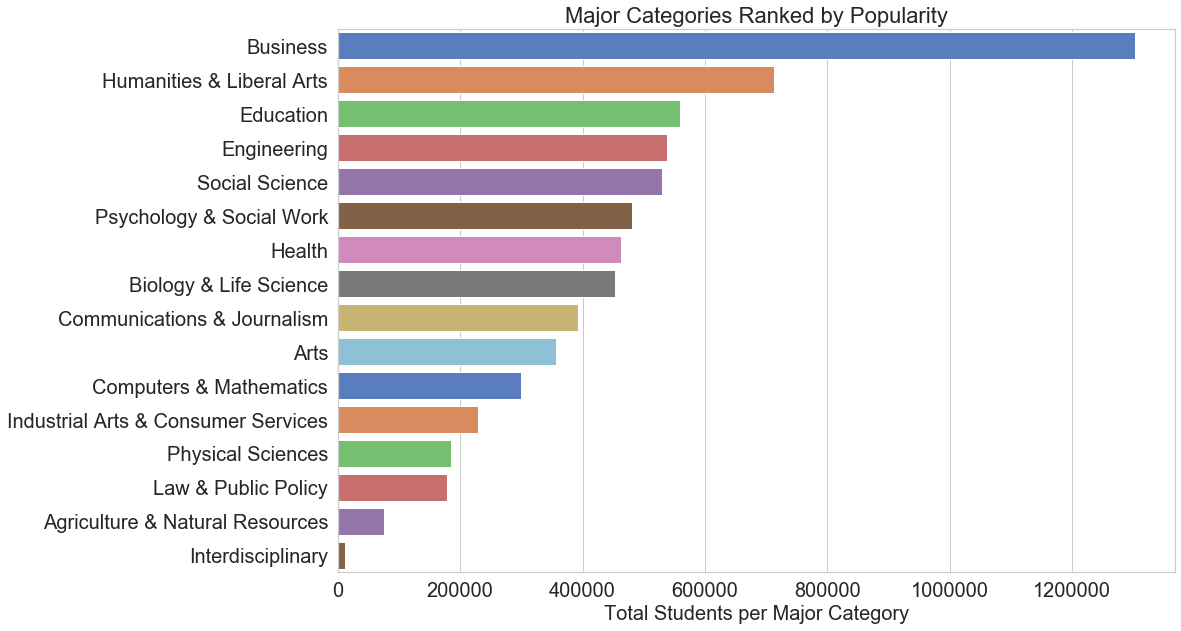

In [19]:
# Calc sum of students for each major category
mc_total = major_category["Total"].sum().sort_values(ascending=False)
mc_total = pd.DataFrame(mc_total)
mc_total["Major Category"] = mc_total.index.values

# plot 
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
sns.barplot(x="Total", y="Major Category", data=mc_total, palette="muted")
plt.title("Major Categories Ranked by Popularity", size=22)
plt.xlabel("Total Students per Major Category", size=20)
plt.ylabel("")
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Business, Humanities & Liberal Arts and Education top the major categories in number of students. Law & Public Policy, Agriculture & Natural Resources and Interdisciplinary have the least. 

Lets now explore the relationship between median salary and major popularity to see whether or not students choosing a popular major are better off. 

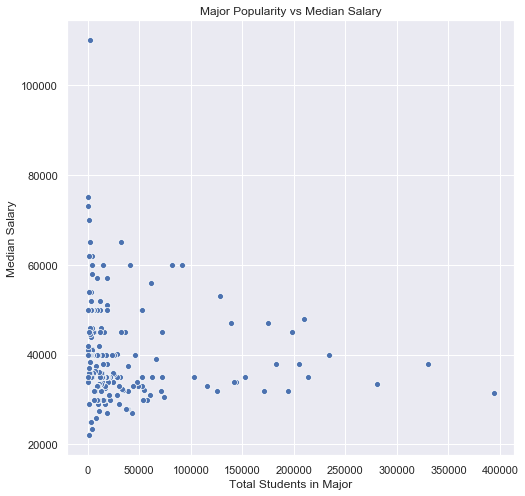

Correlation = -0.09731843743300475


In [22]:
# Plot scatter plot
sns.set(style="darkgrid")
plt.figure(figsize=(8,8))
sns.scatterplot(x="Total", y="Median", data=recent_grads_3)
plt.title("Major Popularity vs Median Salary")
plt.xlabel("Total Students in Major")
plt.ylabel("Median Salary")
plt.show()
print("Correlation = {}".format(recent_grads_2["Total"].corr(recent_grads_2["Median"])))

So there is a only weak negative correlation between a major's popularity and median salary. Looking at the scatter plot though we can see that none of the very popular majors are reporting high median salaries. This is likely due to over supply swinging the job market for these fields into the employer's favor. Sadly, it's unlikely that all of those 400,000 psychology majors are going to find a well paying job as a psychologist. 

We can also see that some of the least popular majors, like petroleum engineering, are reporting high salaries, while others, like library science, are reporting low salaries. This shows that choosing a niche major can pay off as long as the student chooses wisely. 

# Conclusions

From the above analysis we can draw the following conclusions:
- Engineering majors are the most lucrative. Of the top 10 highest-paying majors, 8 fall under the engineering umbrella;
- Being good at science and maths isn't necessary to make a high salary. Business and Law majors seem to do pretty well also;
- Not all STEM degrees are equal. Engineering and computer science majors pay a more handsome salary on average compared to biology and life science majors;
- Arts and Social Science majors dominate the bottom end of the salary rankings;
- There is a weak negative correlation between unemployment rate and median salary. For quite a few of the well paying majors unemployment rate is low, however this is not the case for all of them;
- Arts, Law & Public Policy and Communications & Journalism majors have the highest number of graduates employed in jobs that don't require a college degree, while Biology & Life Science, Education and Engineering majors have the lowest;
- Arts majors lead the major categories on part time employment rates, while Business and Engineering majors have the lowest rates;
- There is a moderate negative correlation between share women and median salary. Many of the major categories with a high proportion of female graduates also report lower median salaries;
- None of the very popular majors, like psychology, are reporting high median salaries. 

On the whole it seems like choosing a major in engineering is the best bet for students wanting to maximise their income and minimise their risk of unemployment and under-employment. However, this is ofcourse not appropriate for students who have no aptitude for science and mathematics. For these students, their best bet would probably be to look at all the majors in their major category of interest and select the one that has the highest median salary and highest chance of finding fulltime, meaningful employment. For example, students interested in health but unsure on exactly which major to choose might consider choosing Nursing over Community and Public Health. 

In [56]:
recent_grads[(recent_grads["Major"] == "NURSING") | (recent_grads["Major"] == "COMMUNITY AND PUBLIC HEALTH")]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,share_pt,share_ncj,share_lwj
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,0.044863,48000,39000,58000,151643,26146,6193,0.194934,0.124865,0.029576
118,119,6110,COMMUNITY AND PUBLIC HEALTH,19735.0,4103.0,15632.0,Health,0.792095,130,14512,...,0.112144,34000,21000,45000,5225,7385,1854,0.323131,0.374208,0.093945


As we can see, Nursing has a lower unemployment rate, higher median salary and a lower share of students in part time employment or in jobs that don't require a college degree. 

Prospective college students should also consider whether or not a college degree is right for them at all given the large number of students in non-college degree jobs for all major categories. Students should research alternative pathways into their chosen careers before committing to an expensive, time consuming degree. 